In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#uploading data files
from google.colab import files
upload = files.upload()

In [81]:
#reading data file using padas
df = pd.read_csv("udemy_courses.csv")
df

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [82]:
print(df.columns)
print(df.shape)

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')
(3678, 12)


In [83]:
#analyse all numeric columns using describe()
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [84]:
df.isnull().sum() #check if there are any null values

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [85]:
print(f"Dataframe shape : {df.shape}")
for column in df.columns:
    print(f"{column} : {len(df[column].value_counts())}")
#number of unique values in each column

Dataframe shape : (3678, 12)
course_id : 3672
course_title : 3663
url : 3672
is_paid : 2
price : 38
num_subscribers : 2197
num_reviews : 511
num_lectures : 229
level : 4
content_duration : 105
published_timestamp : 3672
subject : 4


In [86]:
#removing the duplicate rows
df = df.drop_duplicates()
print(df.shape) #duplicate rows are removed

(3672, 12)


In [87]:
print(df["level"].unique())
print(df["subject"].unique())
print(df["is_paid"].unique())

['All Levels' 'Intermediate Level' 'Beginner Level' 'Expert Level']
['Business Finance' 'Graphic Design' 'Musical Instruments'
 'Web Development']
[ True False]


In [88]:
df["levels"] = -1
df.loc[df["level"]=="All Levels","levels"]=0
df.loc[df["level"]=="Intermediate Level","levels"]=2
df.loc[df["level"]=="Beginner Level","levels"]=1
df.loc[df["level"]=="Expert Level","levels"]=3

df["subjects"] = -1
df.loc[df["subject"]=="Business Finance","subjects"]=0
df.loc[df["subject"]=="Graphic Design","subjects"]=2
df.loc[df["subject"]=="Musical Instruments","subjects"]=1
df.loc[df["subject"]=="Web Development","subjects"]=3

df["paid_or_not"] = -1
df.loc[df["is_paid"]== False,"paid_or_not"] = 0
df.loc[df["is_paid"]== True,"paid_or_not"] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [89]:
df = df.drop(columns = ["level","subject"] )

In [90]:
df

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration,published_timestamp,levels,subjects,paid_or_not
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,1.5,2017-01-18T20:58:58Z,0,0,1
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,39.0,2017-03-09T16:34:20Z,0,0,1
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,2.5,2016-12-19T19:26:30Z,2,0,1
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,3.0,2017-05-30T20:07:24Z,0,0,1
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,2.0,2016-12-13T14:57:18Z,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,2.0,2016-06-14T17:36:46Z,0,3,1
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,3.5,2017-03-10T22:24:30Z,1,3,1
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,3.5,2015-12-30T16:41:42Z,0,3,1
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,3.0,2016-08-11T19:06:15Z,0,3,1


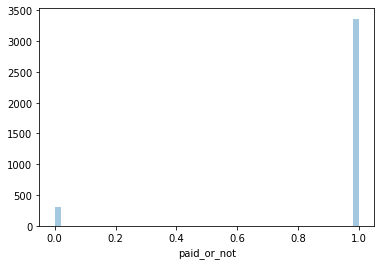

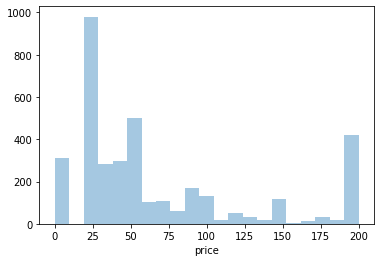

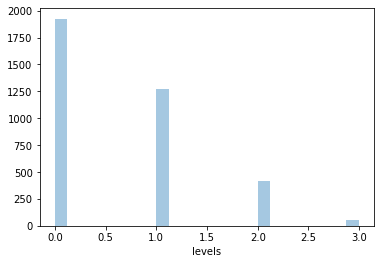

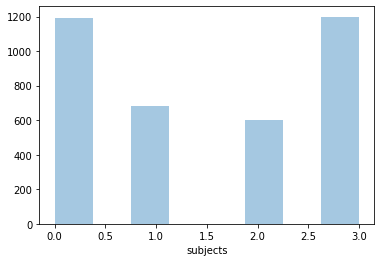

In [91]:
#plotting barplots for categorical data
%matplotlib inline
p1 = sns.distplot(df["paid_or_not"],kde = False)
plt.show()
p2 = sns.distplot(df["price"],kde = False)
plt.show()
p2 = sns.distplot(df["levels"],kde = False)
plt.show()
p2 = sns.distplot(df["subjects"],kde = False)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


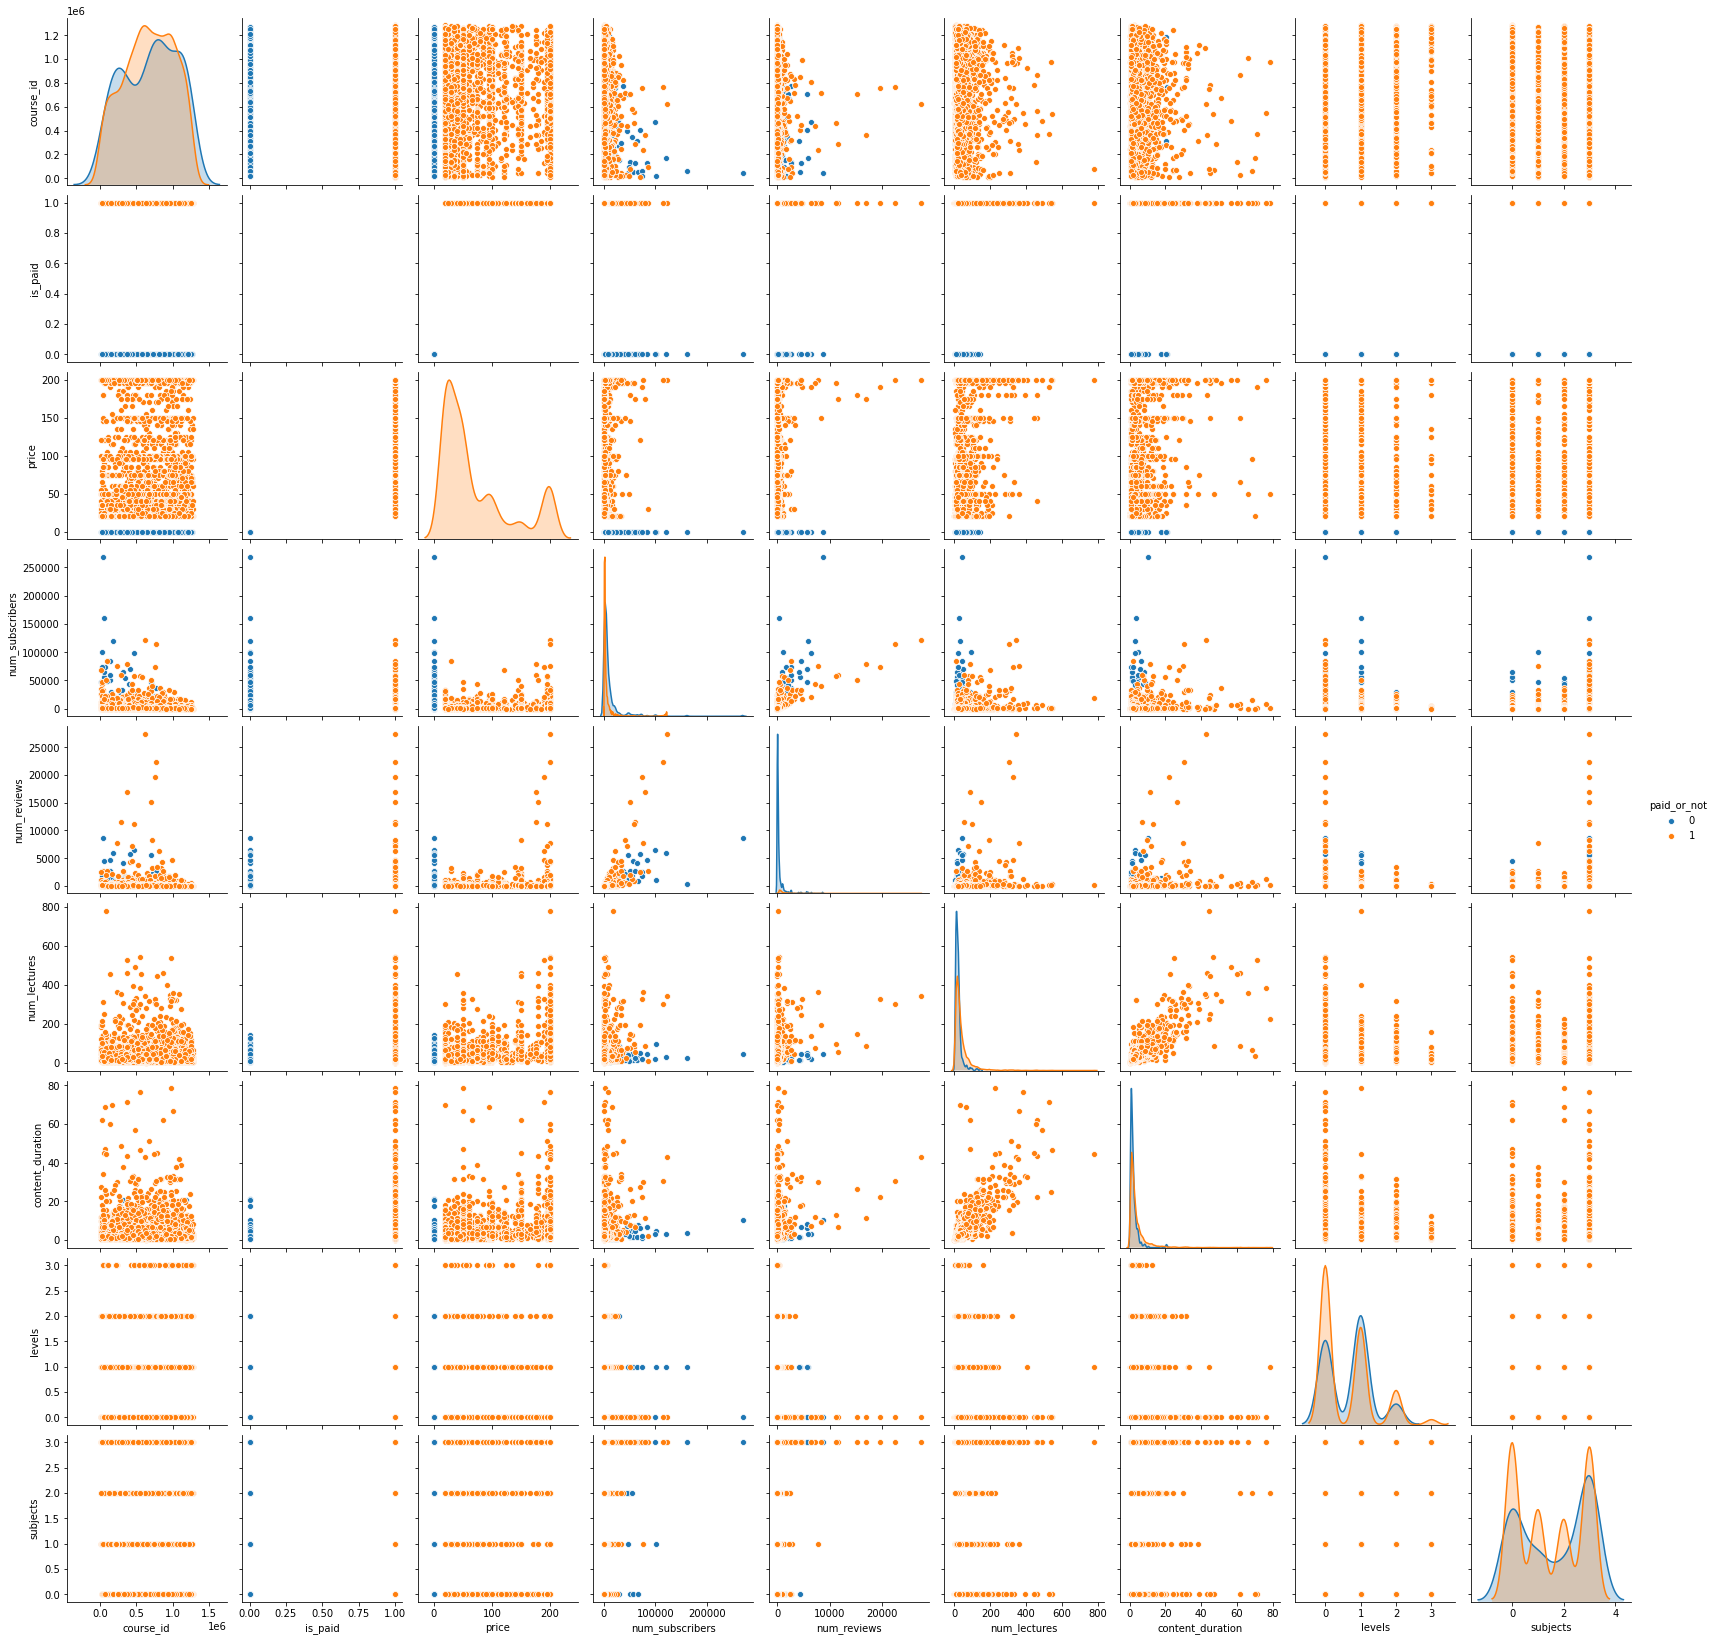

In [92]:
sns.pairplot(df,hue = "paid_or_not")

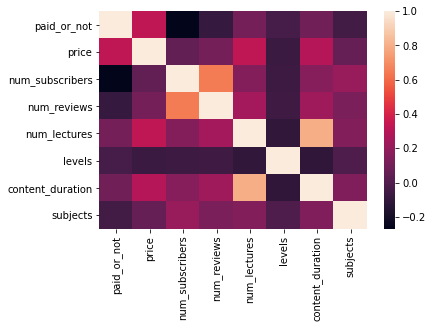

In [104]:
sns.heatmap(df[['paid_or_not', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'levels',
       'content_duration', 'subjects']].corr())

In [105]:
df[['paid_or_not', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'levels',
       'content_duration', 'subjects']].corr()

,paid_or_not,price,num_subscribers,num_reviews,num_lectures,levels,content_duration,subjects
paid_or_not,1.000000,0.328910,-0.267056,-0.087445,0.112788,-0.032982,0.094594,-0.041110
price,0.328910,1.000000,0.050436,0.113568,0.329944,-0.073455,0.293200,0.065144
num_subscribers,-0.267056,0.050436,1.000000,0.651070,0.158351,-0.061454,0.162118,0.214254
num_reviews,-0.087445,0.113568,0.651070,1.000000,0.243019,-0.055654,0.228852,0.125489
num_lectures,0.112788,0.329944,0.158351,0.243019,1.000000,-0.102552,0.801624,0.150738
levels,-0.032982,-0.073455,-0.061454,-0.055654,-0.102552,1.000000,-0.107397,-0.008831
content_duration,0.094594,0.293200,0.162118,0.228852,0.801624,-0.107397,1.000000,0.141784
subjects,-0.041110,0.065144,0.214254,0.125489,0.150738,-0.008831,0.141784,1.000000


Total paid courses:3362, Total unpaid courses:310
levels          0     1    2   3
paid_or_not                     
0             122   158   30   0
1            1803  1110  391  58


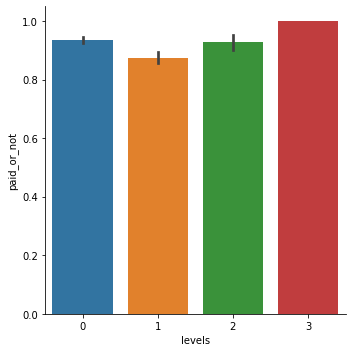

In [124]:
sns.catplot(x = "levels",y = "paid_or_not",data = df,kind = "bar")
print("Total paid courses:{}, Total unpaid courses:{}".format(df["paid_or_not"].value_counts().values[0],df["paid_or_not"].value_counts().values[1]))
print(pd.crosstab(df["paid_or_not"], df["levels"]))
#levels and the if paid or not
#shows that 1.Expert level is not included in unpaid courses
#2.

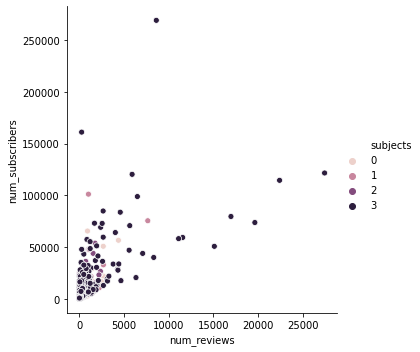

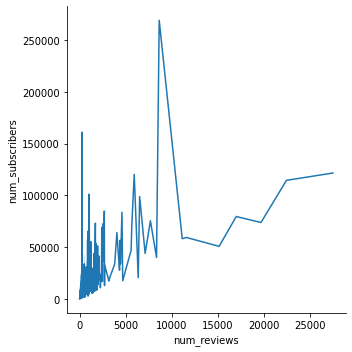

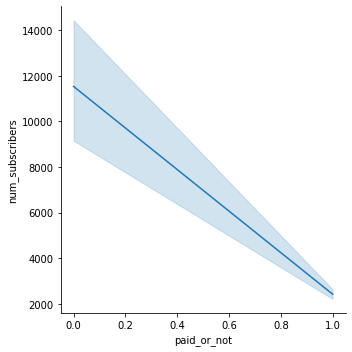

In [133]:
#speciliaty of the courses which have more subscribers
#according to heatmap reviews and subjects has the most effects on subscribers while it dosen't matter
#if the course is paid or not
sns.relplot(x = "num_reviews",y = "num_subscribers",hue = "subjects",data = df)
plt.show()
sns.relplot(x = "num_reviews",y = "num_subscribers",kind = "line",data = df)
plt.show()
#2.we can see that generally as the  number of reviews increase the number of subscribers also increase
#3.most of the courses having more number of subscribers are Web Development courses,also some of the 
#courses having large number of review and large number of subscribers are Web Development courses